In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [8]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [9]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [10]:
# Assign the measurement class to a variable called 'measurement'
measurement = Base.classes.measurement

In [11]:
# Assign the station class to a variable called `station`
station = Base.classes.station

In [12]:
# Create a session
session = Session(engine)

In [13]:
# Display the row's columns and data in dictionary format
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f94208111d0>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01'}

In [14]:
# Display the row's columns and data in dictionary format
first_row = session.query(station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f9420817350>,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1}

# Exploratory Climate Analysis

In [15]:
# Latest Date
final_day = session.query(measurement.date).order_by(measurement.date.desc()).first()
final_day[0]

'2017-08-23'

In [16]:
# Find earliest date of year
query_date = dt.datetime.strptime(final_day[0], '%Y-%m-%d') - dt.timedelta(days=365)
query_date

datetime.datetime(2016, 8, 23, 0, 0)

In [17]:
# Perform query for year's data
precip = session.query(measurement.date, measurement.prcp)\
    .filter(query_date <= measurement.date)\
    .order_by(measurement.date).all()

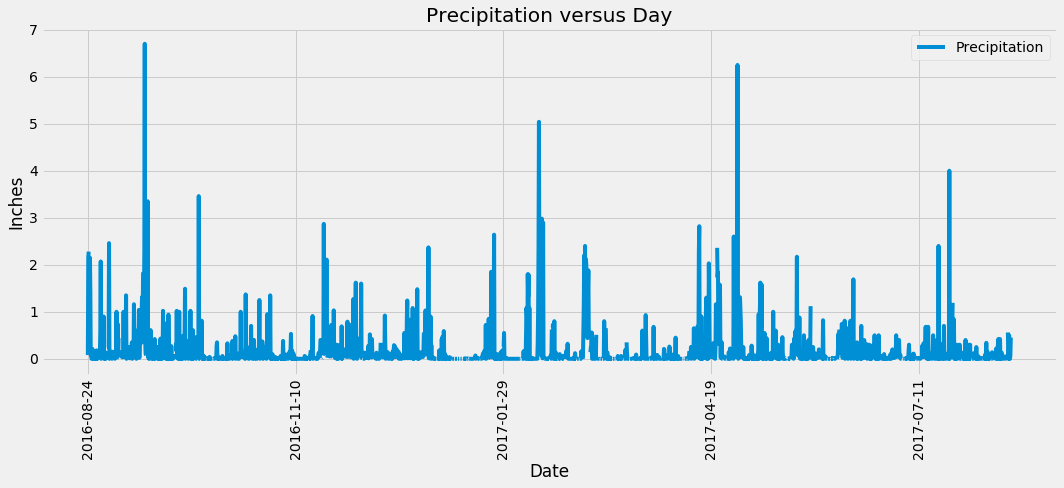

In [18]:
# Plot the Results in a Matplotlib bar chart
df = pd.DataFrame(precip, columns=['Date', 'Precipitation'])
df.set_index('Date', inplace=True)
df.plot(rot=90, figsize=(15,7))
plt.title('Precipitation versus Day')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()

In [66]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_df = df.agg({'Precipitation': ['mean', 'median', 'var', 'std', 'sem']})
summary_df

,Precipitation
mean,0.176462
median,0.020000
var,0.211865
std,0.460288
sem,0.010254


In [67]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(station.id).count()
stations

9

In [68]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active = session.query(measurement.station, func.count(measurement.id))\
    .group_by(measurement.station)\
    .order_by(func.count(measurement.id).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [69]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
busiest_station = session.query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
busiest_station

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [70]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').\
    filter(query_date <= measurement.date).all()


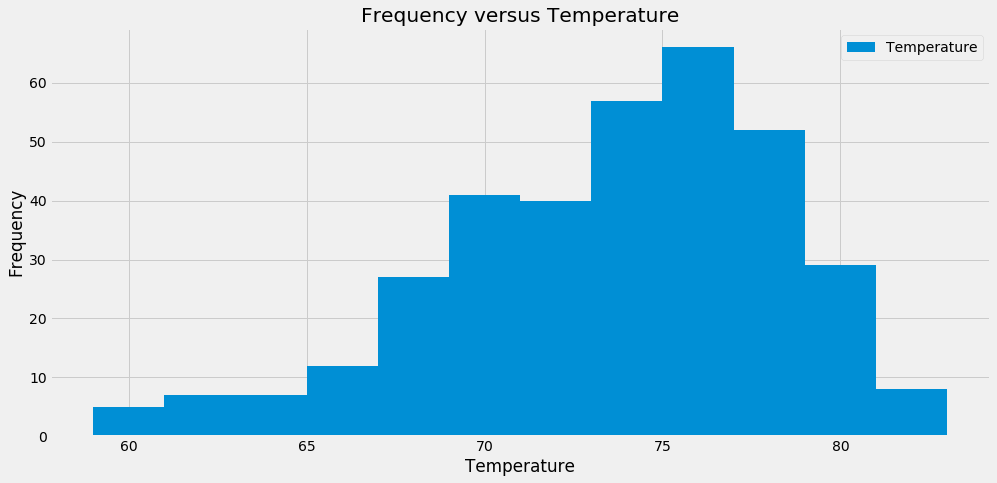

In [71]:
station_df = pd.DataFrame(active_station, columns=['Temperature'])
station_df.plot.hist(bins=12, figsize=(15,7))
plt.title('Frequency versus Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
